In [1]:
import nltk 
import numpy as np

import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD

% matplotlib inline

In [2]:
wordnet_lemmatizer = WordNetLemmatizer()

In [3]:
titles = [line.rstrip() for line in open('../data/all_book_titles.txt')]

In [4]:
stopwords = set(w.rstrip() for w in open('../data/stopwords.txt'))
stopwords = stopwords.union({
    'introduction', 'edition', 'series', 'application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
    'third', 'second', 'fourth'
})

In [5]:
def my_tokenizer(s):
    tokens = list()
    
    for t in nltk.tokenize.word_tokenize(s.lower()):
        if len(t) > 2:
            lem = wordnet_lemmatizer.lemmatize(t)
            if lem not in stopwords and not any(c.isdigit() for c in lem):
                tokens.append(lem)

    return tokens

In [6]:
word_index_map = {}
current_index = 0
all_tokens = []
all_titles = []
index_word_map = []

In [7]:
for title in titles:
    try:
        title = title.encode('ascii', 'ignore').decode('utf-8')
        all_titles.append(title)
        tokens = my_tokenizer(title)
        all_tokens.append(tokens)
        for token in tokens:
            if token not in word_index_map:
                word_index_map[token] = current_index
                current_index += 1
                index_word_map.append(token)
    except:
        pass

In [8]:
def tokens_to_vector(tokens):
    x = np.zeros(len(word_index_map))
    for t in tokens:
        i = word_index_map[t]
        x[i] = 1
    return x

In [9]:
N = len(all_tokens)
D = len(word_index_map)
X = np.zeros((D, N))

In [10]:
i = 0
for tokens in all_tokens:
    X[:,i] = tokens_to_vector(tokens)
    i += 1

In [11]:
svd = TruncatedSVD()
Z = svd.fit_transform(X)

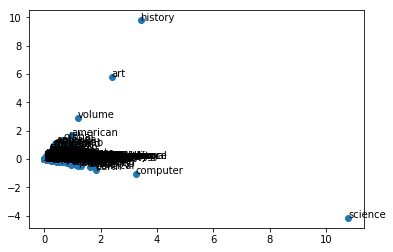

In [12]:
plt.scatter(Z[:,0], Z[:,1])
for i in range(D):
    plt.annotate(s=index_word_map[i], xy=(Z[i,0], Z[i,1]))
plt.show()